In [1]:
import pickle
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
# Loading the feature data from the pickle file
pickle_in = open("dataset/shrinked/X_dense.pickle", "rb")  
X = pickle.load(pickle_in)  
pickle_in.close()  

# Loading the label data from the pickle file
pickle_in = open("dataset/shrinked/y_dense.pickle", "rb")  
y = pickle.load(pickle_in)  
pickle_in.close()  

# Normalizing the features
X = X / 255.0 

# Converting labels to categorical (one-hot encoding) with 3 classes
y = tf.keras.utils.to_categorical(y, num_classes=3)  

# Splitting the data into training and validation sets, 20% for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  


In [10]:
    # Building the model
    model = Sequential([
        Flatten(input_shape=(50, 50, 1)),  
        Dense(128, activation='relu'), 
        Dropout(0.5), 
        Dense(64, activation='relu'), 
        Dropout(0.3),  
        Dense(3, activation='softmax'),  
    ])

    # Compiling the model
    model.compile(
        # Use the Adam optimizer with a learning rate of 0.0001
        optimizer=Adam(learning_rate=0.0001),  
        loss='categorical_crossentropy',  
        metrics=['accuracy']  
    )


C:\Users\Perdorues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# Training the model: Fit the model on the training data (X_train and y_train) for 50 epochs, with a batch size of 32. 
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.3881 - loss: 1.2102 - val_accuracy: 0.6701 - val_loss: 0.9644
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4467 - loss: 1.0610 - val_accuracy: 0.6443 - val_loss: 0.9061
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5497 - loss: 0.9378 - val_accuracy: 0.7577 - val_loss: 0.8220
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6079 - loss: 0.8747 - val_accuracy: 0.7577 - val_loss: 0.7703
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6264 - loss: 0.8390 - val_accuracy: 0.7629 - val_loss: 0.7101
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6245 - loss: 0.8083 - val_accuracy: 0.7835 - val_loss: 0.6751
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6651 - loss: 0.7561 - val_accuracy: 0.8454 - val_loss: 0.6052
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6701 - loss: 0.7381 - val_accuracy: 0.7887 - v

In [5]:
# Evaluating the model: Evaluate the trained model on the validation data (X_val and y_val).
val_loss, val_acc = model.evaluate(X_val, y_val)  
print(f"Validation loss: {val_loss}") 
print(f'Validation accuracy: {val_acc * 100:.2f}%')  


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9323 - loss: 0.1756 
Validation loss: 0.1782311350107193
Validation accuracy: 93.30%


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       320,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 985,739 (3.76 MB)

 Trainable params: 328,579 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 657,160 (2.51 MB)

In [7]:
model.save('water_bottle_classifier_only_dense_layer.h5')

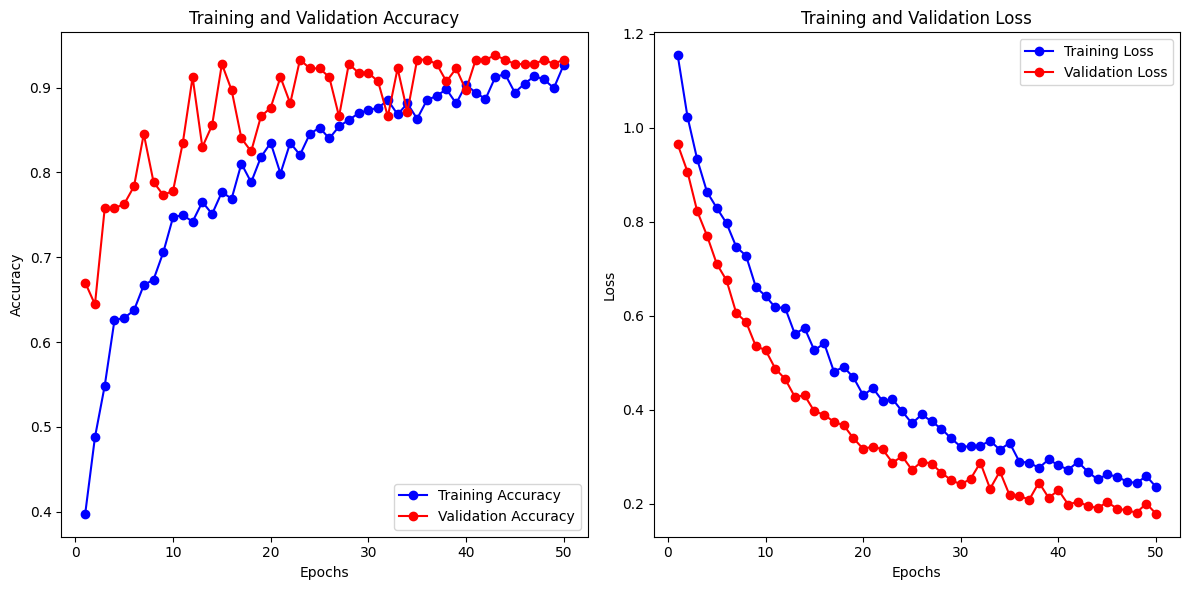

In [8]:
epochs = range(1, 51)  

plt.figure(figsize=(12, 6))  

# Plot accuracy
plt.subplot(1, 2, 1)  
plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')  
plt.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy')  
plt.title('Training and Validation Accuracy')  
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  
plt.legend() 

# Plot loss
plt.subplot(1, 2, 2) 
plt.plot(epochs, history.history['loss'], 'bo-', label='Training Loss') 
plt.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss')  
plt.title('Training and Validation Loss')  
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.legend()  

plt.tight_layout() 
plt.show()  


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


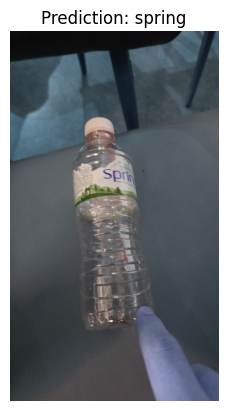

In [9]:
# testing the model by taking a random photo from the path dataset/train/
import cv2
import os

class_names = ['lajthiza', 'spring', 'tepelena']

paths = ['dataset/train/tepelena/', 'dataset/train/lajthiza/', 'dataset/train/spring/']

path = np.random.choice(paths)
files = os.listdir(path)
random_file = np.random.choice(files)
img = cv2.imread(path + random_file, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (50, 50))
img = np.expand_dims(img, axis=-1)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
prediction = np.argmax(prediction, axis=1)

plt.imshow(cv2.imread(path + random_file))
plt.title(f'Prediction: {class_names[prediction[0]]}')
plt.axis('off')

plt.show()
